In [1]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('joined_data_life.csv', index_col=0)

In [3]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,4.7,NaN,NaN
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,4.4,NaN,NaN
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,4.2,NaN,NaN


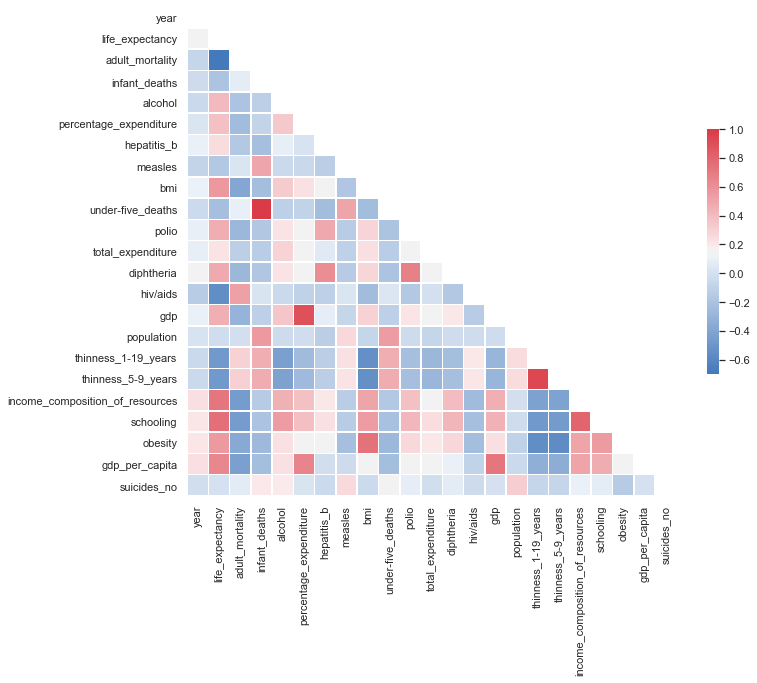

In [4]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

In [5]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN


In [6]:
len(df.country.unique())

193

Is life expectancy increasing over 

# Hypothesis Testing

# Status of Country vs. Life Expectancy

    H(null): Life Expectancy (Developed Country) = Life Expectancy (Developing Country)
    H(alternative): Life Expectancy (Developed Country) != Life Expectancy (Developing Country)

In [7]:
developed = df[df['status']== 'Developed']
developing = df[df['status']== 'Developing']
developing.life_expectancy.dropna(inplace=True)

C:\Users\All PC\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [8]:
stats.ttest_ind(developed['life_expectancy'], developing['life_expectancy'])

Ttest_indResult(statistic=29.76836505889292, pvalue=2.4650861700062064e-170)

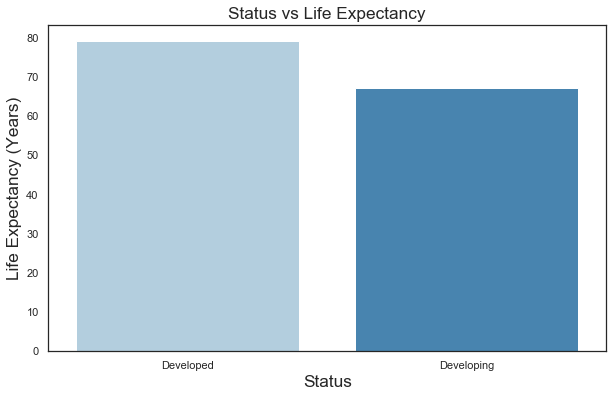

In [9]:
#Lets graph and the difference between status and life expectancy
y = df.groupby(['status']).life_expectancy.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Blues");
sns.set(style='dark')
ax.set_title('Status vs Life Expectancy', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Life Expectancy (Years)', fontdict={'fontsize':'x-large'});
# plt.suptitle(")", fontsize=18);

# Obesity and Status of Country

Is there a difference in obesity in developed countries vs developing countries?

    H(null): Obesity (Developed Country) = Obesity (Developing Country)
    H(alternative): Obesity (Developed Country) != Obesity (Developing Country)

In [10]:
developing.obesity.isna().sum()

309

In [11]:
developed.obesity.isna().sum()

64

In [12]:
developing.obesity.dropna(inplace=True)
developed.obesity.dropna(inplace=True)

C:\Users\All PC\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [13]:
stats.ttest_ind(developed['obesity'], developing['obesity'])

Ttest_indResult(statistic=8.718160546902753, pvalue=4.985541604428258e-18)

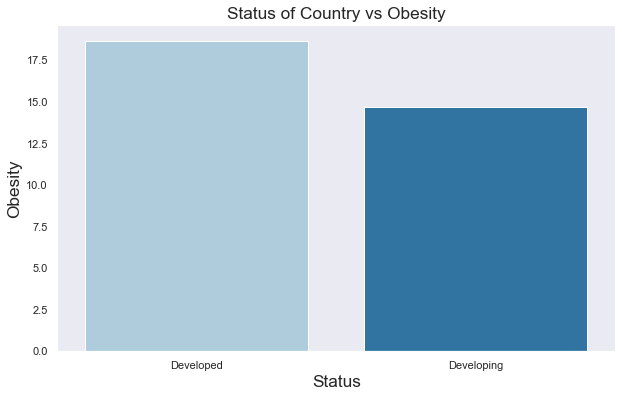

In [14]:
y = df.groupby(['status']).obesity.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Paired");
sns.set(style='dark')
ax.set_title('Status of Country vs Obesity', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Obesity', fontdict={'fontsize':'x-large'});

# Suicide and Status of Country

    H(null): Suicide (Developed Country) = Suicide (Developing Country)
    H(alternative): Suicide (Developed Country) != Suicide (Developing Country)

In [15]:
developing.suicides_no.isna().sum()

1636

In [16]:
developed.suicides_no.isna().sum()

62

In [17]:
developing.suicides_no.dropna(inplace=True)
developed.suicides_no.dropna(inplace=True)

C:\Users\All PC\anaconda3\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [18]:
stats.ttest_ind(developed['suicides_no'], developing['suicides_no'])

Ttest_indResult(statistic=0.6331390757543498, pvalue=0.5267597621093666)

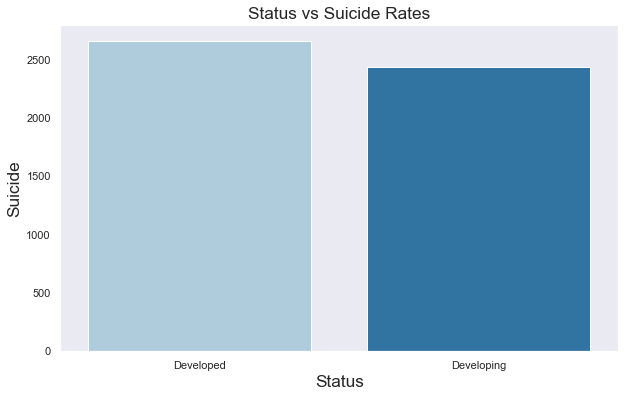

In [19]:
y = df.groupby(['status']).suicides_no.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Paired");
sns.set(style='dark')
ax.set_title('Status vs Suicide Rates', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Suicide', fontdict={'fontsize':'x-large'});

# Regression

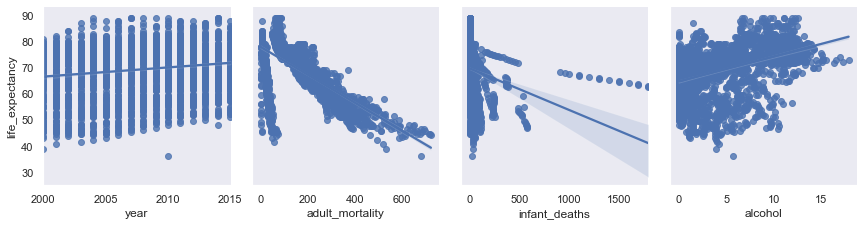

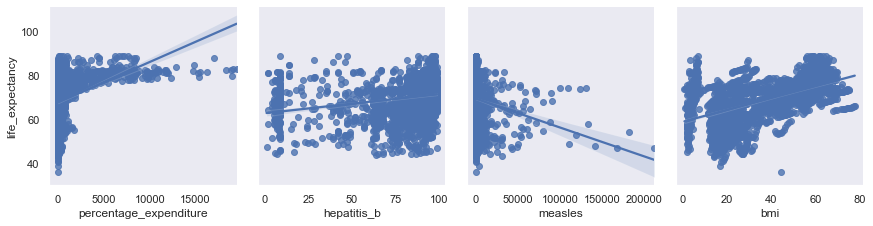

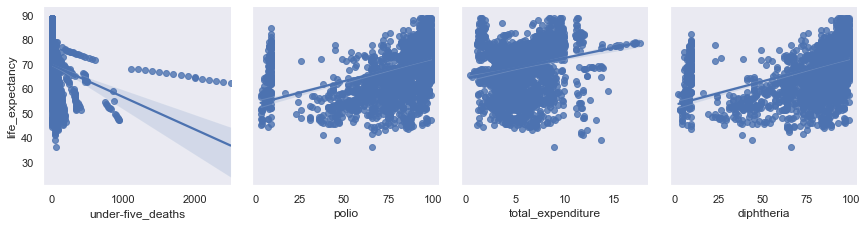

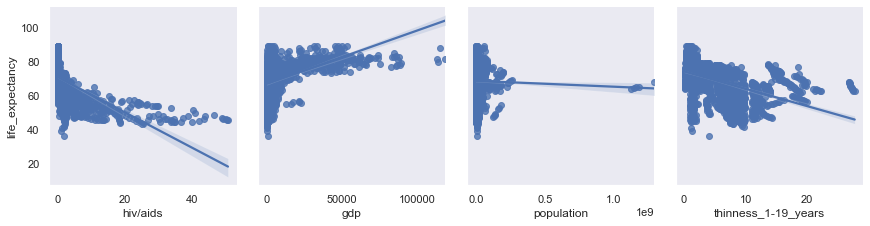

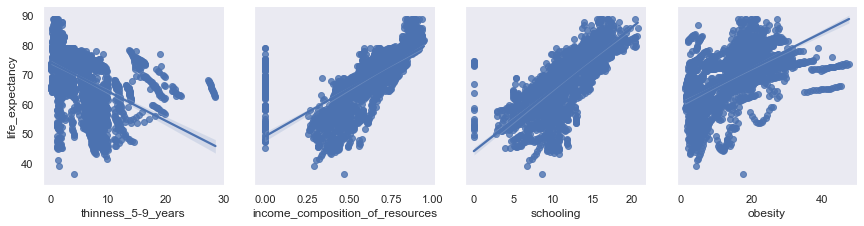

In [20]:
features = ['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'obesity']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

In [21]:
ols('life_expectancy~obesity',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          5.41e-213
Time:                        13:25:43   Log-Likelihood:                -8916.2
No. Observations:                2560   AIC:                         1.784e+04
Df Residuals:                    2558   BIC:                         1.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0747      0.312    192.494      0.000      59.463      60.687
obesity        0.6067      0.018     34.353      0.000       0.572       0.641
==============================================================================
Omnibus:                       46.430   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.145
Skew:                          -0.315   Prob(JB):                     2.13e-11
Kurtosis:                       3.252   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'obesity', 'gdp_per_capita', 'suicides_no'],
      dtype='object')

In [23]:
ols('life_expectancy~schooling+obesity+alcohol+income_composition_of_resources+diphtheria+percentage_expenditure',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     818.7
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:25:43   Log-Likelihood:                -7418.5
No. Observations:                2382   AIC:                         1.485e+04
Df Residuals:                    2375   BIC:                         1.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          40.9916      0.522     78.457      0.000      39.967      42.016
schooling                           1.0847      0.066     16.558      0.000       0.956       1.213
obesity                             0.1600      0.016      9.976      0.000       0.129       0.191
alcohol                            -0.1349      0.034     -3.940      0.000      -0.202      -0.068
income_composition_of_resources    12.6138      0.888     14.208      0.000      10.873      14.355
diphtheria                          0.0609      0.005     11.459      0.000       0.050       0.071
percentage_expenditure              0.0005   5.87e-05      9.083      0.000       0.000       0.001
==============================================================================
Omnibus:                      221.373   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.714
Skew:                          -0.415   Prob(JB):                    1.49e-176
Kurtosis:                       5.733   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'obesity', 'gdp_per_capita', 'suicides_no'],
      dtype='object')

In [25]:
dfs= df.drop(['country', 'year','status'], axis=1)

In [26]:
scaler = StandardScaler()
scaler.fit(dfs)
df_scaled = scaler.transform(dfs)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = list(dfs.columns)

In [27]:
dfs.head(2)

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN


In [30]:
ols('life_expectancy~schooling+obesity+alcohol+income_composition_of_resources+diphtheria+percentage_expenditure',data=df_scaled).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     818.7
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:26:40   Log-Likelihood:                -2050.4
No. Observations:                2382   AIC:                             4115.
Df Residuals:                    2375   BIC:                             4155.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.0068      0.012     -0.573      0.567      -0.030       0.016
schooling                           0.3826      0.023     16.558      0.000       0.337       0.428
obesity                             0.1503      0.015      9.976      0.000       0.121       0.180
alcohol                            -0.0574      0.015     -3.940      0.000      -0.086      -0.029
income_composition_of_resources     0.2793      0.020     14.208      0.000       0.241       0.318
diphtheria                          0.1516      0.013     11.459      0.000       0.126       0.178
percentage_expenditure              0.1113      0.012      9.083      0.000       0.087       0.135
==============================================================================
Omnibus:                      221.373   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              809.714
Skew:                          -0.415   Prob(JB):                    1.49e-176
Kurtosis:                       5.733   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When scaled we can see our of all of our features schooling has the biggest correlation to life expectancy.

In [29]:
developing.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Burkina Faso', 'Burundi', "Côte d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Cuba',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras'

In [ ]:
!pip install plotly
import plotly 
plotly.offline.init_notebook_mode()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=4, cols=1,
    row_heights=[0.25, 0.25, 0.25, 0.25],
    vertical_spacing=0.025)
#     subplot_titles=("World Life Expectancy", "Status of Countries", 
#                     "Income Composition of Resources", "Highest Average Age of Schooling"),
#     specs=[[{"type": "Choropleth", "rowspan": 1}],
#            [{"type": "Choropleth", "rowspan": 1}],
#           [{"type": "Choropleth", "rowspan": 1}],
#            [{"type": "Choropleth", "rowspan": 1}]])